In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("train-15.csv")
data.tail()

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,No,IS,Age,NeuP,NeuC,MonP,LymP,Hgb,RDW-CV,MCV,MCHC,UA,CG,AKP,TP,TC,HDL-C
8375,15286,0,48,41.5,2.71,5.4,49.3,131,13.4,90.0,321,255,29.3,84,69.4,4.94,1.60
8376,312283,1,80,64.0,3.89,6.1,26.0,111,10.8,93.0,332,325,21.5,69,60.5,3.16,1.19
8377,4916,0,65,69.9,3.14,3.5,25.7,121,13.2,92.0,324,257,30.6,94,74.9,5.21,1.84
8378,6844,0,50,54.4,3.75,5.7,39.2,152,12.7,99.1,345,282,21.4,51,64.2,5.09,1.62
8379,14723,0,69,50.8,1.40,4.9,43.3,153,12.1,93.0,341,417,27.9,54,71.8,5.90,1.52


In [2]:
data=data.drop(['No'],axis=1)
# Split target and features
X = data.drop(['IS'],axis=1)
X

y = data['IS']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(8380, 15)
(8380,)


In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=1.01)
# knn
model2 = KNeighborsClassifier(n_neighbors=31)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=187)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=5, min_child_weight=6)

## elastic net
##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# neural network
model6 = MLPClassifier(alpha=0.001, hidden_layer_sizes=17)

# GaussianNB
model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

## 所以此处直接就是 by default 来设置

C:\Users\93513\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# fit model
model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
model4.fit(X, y)
## model5.fit(X_train, y_train)
model6.fit(X, y)
model7.fit(X, y)

# predict probabilities
pred_prob1 = model1.predict_proba(X)
pred_prob2 = model2.predict_proba(X)
pred_prob3 = model3.predict_proba(X)
pred_prob4 = model4.predict_proba(X)
## pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X)
pred_prob7 = model7.predict_proba(X)

[10:37:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)
pred3 = model3.predict(X)
pred4 = model4.predict(X)
## pred5 = model5.predict(X_test)
pred6 = model6.predict(X)
pred7 = model7.predict(X)

In [7]:
print(pred1)
print(pred2)
print(pred3)

[1 1 0 ... 0 0 0]
[1 1 0 ... 1 0 0]
[1 1 0 ... 0 0 0]


In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y, pred_prob4[:,1], pos_label=1)
## fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

# pos_label : 整数或者字符串, 默认None，表示被认为是正类样本的类别, 可以不填，因为运行三五十个点后就可以看到ROC曲线了

In [9]:
# AUC score can be computed using the roc_auc_score() method of sklearn:


### 因为 elastic net的很多evaluation metrics 不能显示，所以接下来注掉 model5

from sklearn.metrics import roc_auc_score


In [10]:
def bootstrap_auc(model1, X, y, nsamples=1000):
    auc_values1 = []
    for b in range(nsamples):
        idx1 = np.random.randint(X.shape[0], size=X.shape[0])
        model1.fit(X[idx1], y[idx1])
        pred1_ = model1.predict_proba(X)[:, 1]
        roc_auc1 = roc_auc_score(y.ravel(), pred1_.ravel())
        auc_values1.append(roc_auc1)
    return np.percentile(auc_values1, (2.5, 97.5))

In [11]:
# 1 - auc scores testing set
auc_score1 = roc_auc_score(y, pred_prob1[:,1])
auc_score2 = roc_auc_score(y, pred_prob2[:,1])
auc_score3 = roc_auc_score(y, pred_prob3[:,1])
auc_score4 = roc_auc_score(y, pred_prob4[:,1])
## auc_score5 = roc_auc_score(y_test, pred_prob5)
auc_score6 = roc_auc_score(y, pred_prob6[:,1])
auc_score7 = roc_auc_score(y, pred_prob7[:,1])



print(auc_score1, auc_score2, auc_score3, auc_score4,auc_score6,auc_score7)

0.9042489684027093 0.9234415756997874 1.0 0.9607733303559034 0.937266703290882 0.8892946607647794


In [12]:
## Calculating 95% CI for AUC

#### https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FzFGNa.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F50437354%2Fhow-to-calculate-95-confidence-interval-for-auc-from-confusion-matrix&tbnid=vFftbLzgp01LlM&vet=12ahUKEwintYqzxozzAhUTUn0KHQfoDFkQMygAegUIARCqAQ..i&docid=jK-T-QoSUo5GyM&w=1622&h=836&q=calculating%20confidence%20interval%20auc%20python&ved=2ahUKEwintYqzxozzAhUTUn0KHQfoDFkQMygAegUIARCqAQ


### https://gist.github.com/doraneko94/e24643136cfb8baf03ef8a314ab9615c

In [13]:
from math import sqrt

In [14]:
## model 1-LR

N1 = sum(y == 1)
N2 = sum(y != 1)
print (N1, N2)

Q1_1 = auc_score1 / (2 - auc_score1)
Q2_1 = 2*auc_score1**2 / (1 + auc_score1)
print (Q1_1, Q2_1)

SE_AUC_1 = sqrt((auc_score1*(1-auc_score1)+(N1-1)*(Q1_1- auc_score1**2)+(N2-1)*(Q2_1-auc_score1**2))/(N1*N2))
lower1 = auc_score1 - 1.96*SE_AUC_1
upper1 = auc_score1 + 1.96*SE_AUC_1
print(SE_AUC_1)
print(auc_score1)
print(lower1,upper1)

3996 4384
0.8252321397175174 0.8587807691377932
0.00346654059499523
0.9042489684027093
0.8974545488365187 0.9110433879688999


In [15]:
## model 2 - k-NN

Q1_2 = auc_score2 / (2 - auc_score2)
Q2_2 = 2*auc_score2**2 / (1 + auc_score2)
print (Q1_2, Q2_2)

SE_AUC_2 = sqrt((auc_score2*(1-auc_score2)+(N1-1)*(Q1_2- auc_score2**2)+(N2-1)*(Q2_2-auc_score2**2))/(N1*N2))
lower2 = auc_score2 - 1.96*SE_AUC_2
upper2 = auc_score2 + 1.96*SE_AUC_2
print(SE_AUC_2)
print(auc_score2)
print(lower2,upper2)

0.8577719098710739 0.8866859846477638
0.003105239781127702
0.9234415756997874
0.9173553057287771 0.9295278456707976


In [16]:
## model 3 - RF

Q1_3 = auc_score3 / (2 - auc_score3)
Q2_3 = 2*auc_score3**2 / (1 + auc_score3)
print (Q1_3, Q2_3)

SE_AUC_3 = sqrt((auc_score3*(1-auc_score3)+(N1-1)*(Q1_3- auc_score3**2)+(N2-1)*(Q2_3-auc_score3**2))/(N1*N2))
lower3 = auc_score3 - 1.96*SE_AUC_3
upper3 = auc_score3 + 1.96*SE_AUC_3
print(SE_AUC_3)
print(auc_score3)
print(lower3,upper3)

1.0 1.0
0.0
1.0
1.0 1.0


In [17]:
## model 4 - XGBoost

Q1_4 = auc_score4 / (2 - auc_score4)
Q2_4 = 2*auc_score4**2 / (1 + auc_score4)
print (Q1_4, Q2_4)

SE_AUC_4 = sqrt((auc_score4*(1-auc_score4)+(N1-1)*(Q1_4- auc_score4**2)+(N2-1)*(Q2_4-auc_score4**2))/(N1*N2))
lower4 = auc_score4 - 1.96*SE_AUC_4
upper4 = auc_score4 + 1.96*SE_AUC_4
print(SE_AUC_4)
print(auc_score4)
print(lower4,upper4)

0.9245079619491856 0.9415523742926706
0.002224156937977081
0.9607733303559034
0.9564139827574684 0.9651326779543384


In [18]:
## model 6 - NN

Q1_6 = auc_score6 / (2 - auc_score6)
Q2_6 = 2*auc_score6**2 / (1 + auc_score6)
print (Q1_6, Q2_6)

SE_AUC_6 = sqrt((auc_score6*(1-auc_score6)+(N1-1)*(Q1_6- auc_score6**2)+(N2-1)*(Q2_6-auc_score6**2))/(N1*N2))
lower6 = auc_score6 - 1.96*SE_AUC_6
upper6 = auc_score6 + 1.96*SE_AUC_6
print(SE_AUC_6)
print(auc_score6)
print(lower6,upper6)

0.881939717324414 0.9069157815033746
0.002812843312622345
0.937266703290882
0.9317535303981422 0.9427798761836218


In [19]:
## model 7 - GaussianNB

Q1_7 = auc_score7 / (2 - auc_score7)
Q2_7 = 2*auc_score7**2 / (1 + auc_score7)
print (Q1_7, Q2_7)

SE_AUC_7 = sqrt((auc_score7*(1-auc_score7)+(N1-1)*(Q1_7- auc_score7**2)+(N2-1)*(Q2_7-auc_score7**2))/(N1*N2))
lower7 = auc_score7 - 1.96*SE_AUC_7
upper7 = auc_score7 + 1.96*SE_AUC_7
print(SE_AUC_7)
print(auc_score7)
print(lower7,upper7)

0.8006575905875322 0.8371854428939242
0.0037198653556553426
0.8892946607647794
0.8820037246676949 0.8965855968618638


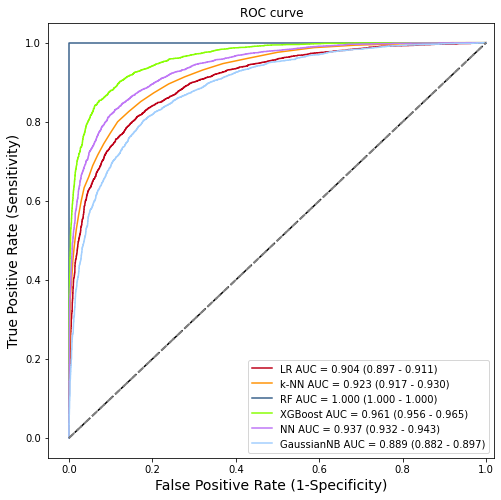

In [20]:
# plot the ROC curves for the two algorithms using matplotlib:
# Ref: https://github.com/stanfordmlgroup/influenza-qtof/blob/master/notebooks/VTM_Subtraction.ipynb

#name_dict[names[l]] + ' (AUC = %0.2f (95%% CI %0.2f - %0.2f))' % (test_aucs[l], cis[names[l]][0], cis[names[l]][1]))
# plot roc curves

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

fig = plt.figure(figsize=(8,8))
lw = 2

plt.plot(fpr1, tpr1,color='#be0119', label= 'LR' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score1, lower1, upper1))
plt.plot(fpr2, tpr2,color='#ff9408', label= 'k-NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score2, lower2, upper2))
plt.plot(fpr3, tpr3,color='#3b638c', label= 'RF' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score3, lower3, upper3))
plt.plot(fpr4, tpr4,color='#89fe05', label= 'XGBoost' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score4, lower4, upper4))
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6,color='#bf77f6', label= 'NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score6, lower6, upper6))
plt.plot(fpr7, tpr7,color='#a2cffe', label= 'GaussianNB' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score7, lower7, upper7))
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate (1-Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.xlim(-0.05,1.02)    # remove the space from the curve to the axes
plt.ylim(-0.05,1.05)


plt.show()

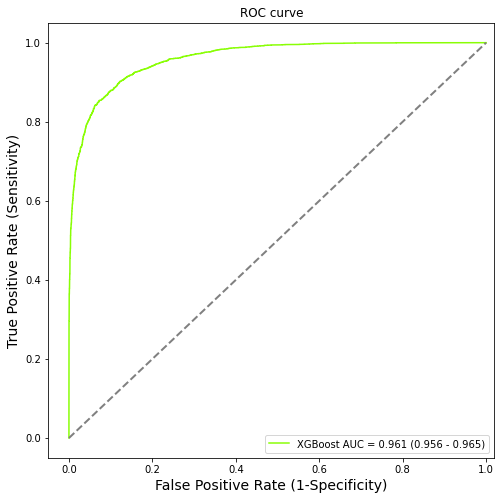

In [21]:
# plot the ROC curves for the two algorithms using matplotlib:
# Ref: https://github.com/stanfordmlgroup/influenza-qtof/blob/master/notebooks/VTM_Subtraction.ipynb

#name_dict[names[l]] + ' (AUC = %0.2f (95%% CI %0.2f - %0.2f))' % (test_aucs[l], cis[names[l]][0], cis[names[l]][1]))
# plot roc curves

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

fig = plt.figure(figsize=(8,8))
lw = 2

# plt.plot(fpr1, tpr1,color='#be0119', label= 'LR' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score1, lower1, upper1))
# plt.plot(fpr2, tpr2,color='#ff9408', label= 'k-NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score2, lower2, upper2))
# plt.plot(fpr3, tpr3,color='#3b638c', label= 'RF' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score3, lower3, upper3))
plt.plot(fpr4, tpr4,color='#89fe05', label= 'XGBoost' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score4, lower4, upper4))
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
# plt.plot(fpr6, tpr6,color='#bf77f6', label= 'NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score6, lower6, upper6))
# plt.plot(fpr7, tpr7,color='#a2cffe', label= 'GaussianNB' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score7, lower7, upper7))
# plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate (1-Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(loc='lower right')
plt.savefig('ROC',dpi=500)
plt.xlim(-0.05,1.02)    # remove the space from the curve to the axes
plt.ylim(-0.05,1.05)


plt.show()

In [22]:
# 2 - accuracy on test sets

In [23]:
acc1 = model1.score(X,y)
acc2 = model2.score(X,y)
acc3 = model3.score(X,y)
acc4 = model4.score(X,y)
## acc5 = model5.score(X_train,y_train)
acc6 = model6.score(X,y)
acc7 = model7.score(X,y)
print(acc1,acc2,acc3,acc4,acc6,acc7)

0.8245823389021479 0.8344868735083533 1.0 0.889618138424821 0.8596658711217183 0.8039379474940335


In [24]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

In [25]:
# 3-precision
precision1 = precision_score(y, pred1)
precision2 = precision_score(y, pred2)
precision3 = precision_score(y, pred3)
precision4 = precision_score(y, pred4)
## precision5 = precision_score(y_test, pred5)
precision6 = precision_score(y, pred6)
precision7 = precision_score(y, pred7)
print(precision1,precision2,precision3,precision4,precision6,precision7)

0.828563995837669 0.8904519604908709 1.0 0.8985206332727744 0.8645294725956567 0.8425036390101892


In [26]:
# 4 - recall / sensitivity

recall1 = recall_score(y, pred1)
recall2 = recall_score(y, pred2)
recall3 = recall_score(y, pred3)
recall4 = recall_score(y, pred4)
## recall5 = recall_score(y_test, pred5)
recall6 = recall_score(y, pred6)
recall7 = recall_score(y,pred7)

print(recall1,recall2,recall3,recall4,recall6,recall7)

0.7970470470470471 0.7444944944944945 1.0 0.8663663663663663 0.8368368368368369 0.7242242242242243


In [27]:
# 5-F1

f11 = f1_score(y, pred1)
f12 = f1_score(y, pred2)
f13 = f1_score(y, pred3)
f14 = f1_score(y, pred4)
#f15 = f1_score(y_test, pred5)
f16 = f1_score(y, pred6)
f17 = f1_score(y, pred7)

print(f11,f12,f13,f14,f16,f17)

0.8125 0.8109581572849938 1.0 0.882150592432157 0.8504577822990845 0.7788992060287984


In [28]:
# 6-log-loss

log1 = log_loss(y, pred_prob1)
log2 = log_loss(y, pred_prob2)
log3 = log_loss(y, pred_prob3)
log4 = log_loss(y, pred_prob4)
# log5 = log_loss(y_test, pred_prob5)
log6 = log_loss(y, pred_prob6)
log7 = log_loss(y, pred_prob7)

print(log1,log2,log3,log4,log6,log7)

0.389737852737084 0.3672707640561493 0.1051076571853426 0.2673826420669547 0.3175433585004154 0.5436887404015525


In [29]:
# 7-Specificity

# 没有具体的接口计算specificity，但是可以创建confusion matrix，然后通过 TP,Fn,FP,TN这些指标来计算

from sklearn.metrics import confusion_matrix

# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]

cm1 = confusion_matrix(y,pred1)   # 创建行是真实值，列是预测值
cm2 = confusion_matrix(y,pred2) 
cm3 = confusion_matrix(y,pred3) 
cm4 = confusion_matrix(y,pred4) 
# cm5 = confusion_matrix(y_test,pred5)
cm6 = confusion_matrix(y,pred6)
cm7 = confusion_matrix(y,pred7)


# sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])      #特异度 TN/(TN+FP)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
specificity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
#specificity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
specificity6 = cm6[0,0]/(cm6[0,0]+cm6[0,1])
specificity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])


print(specificity1,specificity2,specificity3,specificity4,specificity6,specificity7)

0.8496806569343066 0.9165145985401459 1.0 0.9108120437956204 0.8804744525547445 0.8765967153284672
